In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

%matplotlib inline

In [6]:
## Chargement des données de modélisation

In [7]:
df = pd.read_csv("../../data/processed/lieu-compteur-classes-one-hot-encoded.csv", index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204344 entries, 57773 to 1039253
Data columns (total 76 columns):
 #   Column                                                                 Non-Null Count    Dtype 
---  ------                                                                 --------------    ----- 
 0   Jour                                                                   1204344 non-null  int64 
 1   Mois                                                                   1204344 non-null  int64 
 2   Année                                                                  1204344 non-null  int64 
 3   Heure                                                                  1204344 non-null  int64 
 4   Jour_semaine                                                           1204344 non-null  int64 
 5   Jour férié                                                             1204344 non-null  int64 
 6   Vacances scolaires                                                     1204

In [8]:
## Renommage des classes et processing variables catégorielles

In [9]:
y = df["Comptage horaire"].replace({
    "0-3": "[00] 0-3",
    "4-9": "[01] 4-9",
    "10-18": "[02] 10-18",
    "19-31": "[03] 19-31",
    "32-46": "[04] 32-46",
    "47-64": "[05] 47-64",
    "65-86": "[06] 65-86",
    "87-115": "[07] 87-115",
    "116-155": "[08] 116-155",
    "156-230": "[09] 156-230",
    "231-450": "[10] 231-450",
    "451+": "[11] 451+",
})
X = df.drop(columns=["Comptage horaire"])

col_norm = ["Jour", "Mois", "Année", "Heure", "Jour_semaine", "Jour férié", "Vacances scolaires"]
encoder = preprocessing.OneHotEncoder(sparse_output=False, dtype=int) 

array = encoder.fit_transform(X[col_norm])

encoded_df_clean = pd.DataFrame(array, columns=encoder.get_feature_names_out(col_norm))

encoded_df_clean.index = X.index


X_clean = pd.concat([X.drop(columns=col_norm), encoded_df_clean], axis=1)

In [10]:
X_clean.head()

,Nom du site de comptage_10 avenue de la Grande Armée,Nom du site de comptage_10 boulevard Auguste Blanqui,Nom du site de comptage_102 boulevard de Magenta,Nom du site de comptage_106 avenue Denfert Rochereau,Nom du site de comptage_129 rue Lecourbe,Nom du site de comptage_132 rue Lecourbe,Nom du site de comptage_135 avenue Daumesnil,Nom du site de comptage_147 avenue d'Italie,Nom du site de comptage_152 boulevard du Montparnasse,Nom du site de comptage_16 avenue de la Porte des Ternes,...,Jour_semaine_2,Jour_semaine_3,Jour_semaine_4,Jour_semaine_5,Jour_semaine_6,Jour_semaine_7,Jour férié_0,Jour férié_1,Vacances scolaires_0,Vacances scolaires_1
57773,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1092998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1171485,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
57487,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
57812,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [11]:
## Encodage variable cible

In [12]:
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

In [ ]:
y = df["Comptage horaire"]
X = df.drop(columns=["Comptage horaire"])
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)


In [27]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Évaluation du modèle
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.39169839207203916

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53     21765
           1       0.32      0.28      0.30     20398
           2       0.34      0.29      0.32     20447
           3       0.38      0.41      0.40     20928
           4       0.29      0.31      0.30     21144
           5       0.55      0.71      0.62     21875
           6       0.30      0.23      0.26     20456
           7       0.43      0.47      0.45     20606
           8       0.77      0.70      0.73     10077
           9       0.31      0.32      0.31     21160
          10       0.28      0.22      0.25     20783
          11       0.31      0.32      0.32     21230

    accuracy                           0.39    240869
   macro avg       0.40      0.40      0.40    240869
weighted avg       0.38      0.39      0.39    240869



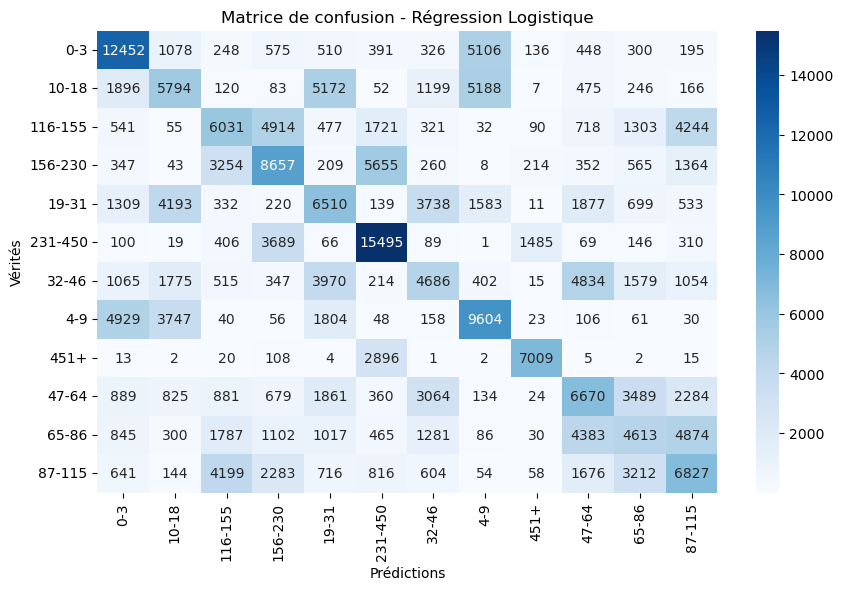

In [25]:
# Récupérer les noms des classes à partir de LabelEncoder
class_labels = label_enc.classes_  # Assurez-vous que label_enc est bien l'instance utilisée pour y

# Générer la matrice de confusion avec des labels lisibles
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion - Régression Logistique")
plt.yticks(rotation=0)
plt.show()